## General data exploration

In [2]:
import os

folder_train_test = ["../data/train", "../data/test"]

for path in folder_train_test:
    print(f"--- Statistiques pour {path} ---")
    folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    total_files = 0

    for folder in folders:
        folder_path = os.path.join(path, folder)
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        print(f"{folder} : {len(files)}")
        total_files += len(files)

    print(f"Total d'images dans {path} : {total_files}\n")


--- Statistiques pour ../data/train ---
angry : 3995
disgust : 436
fear : 4097
happy : 7212
neutral : 4965
sad : 4830
surprise : 3171
Total d'images dans ../data/train : 28706

--- Statistiques pour ../data/test ---
angry : 958
disgust : 111
fear : 1024
happy : 1774
neutral : 1233
sad : 1247
surprise : 831
Total d'images dans ../data/test : 7178



The classes are not equal so we will use data augmentation (same idea as SMOTE but for images) to radjust their number

This was made in the processing_data.py

## Data Augmentation

We have to use open cv manipulation to increase the number of image for the class "disgust" and "surprise"

Rotation

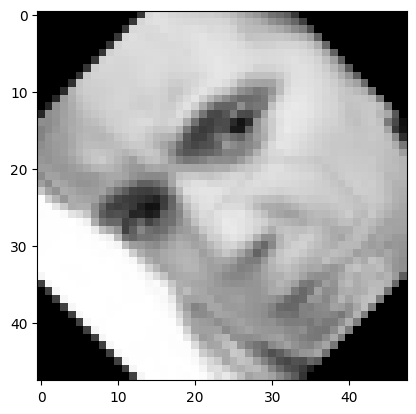

In [2]:
from matplotlib import pyplot as plt
import glob
import cv2

images_path = glob.glob("../data/train/disgust/*.jpg")

img = cv2.imread(images_path[1])
height, width = img.shape[:2]
center = (width // 2, height // 2)
angle = 45
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))
grey_image_rotated = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY) ## grey scaling, we have to convert into just 2-D to avoid the 3 canals RGB

plt.imshow(rotated_image)
plt.show()

Translation

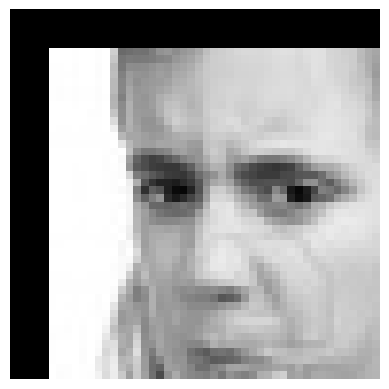

In [3]:
import numpy as np
img = cv2.imread(images_path[1])
tx, ty = 5, 5  

# Create the translation matrix
translation_matrix = np.float32([
    [1, 0, tx],
    [0, 1, ty]
])

height, width = img.shape[:2]

translated_image = cv2.warpAffine(img, translation_matrix, (width, height))

translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)


plt.imshow(translated_image_rgb)
plt.axis('off')
plt.show()

Brightness

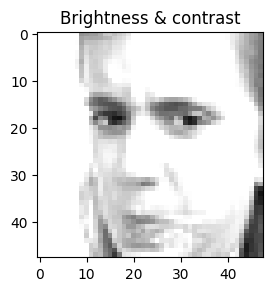

In [10]:
brightness = 10 
contrast = 1.3  
img = cv2.imread(images_path[1])
image2 = cv2.addWeighted(img, contrast, np.zeros(img.shape, img.dtype), 0, brightness)
plt.subplot(1, 2, 2)
plt.title("Brightness & contrast")
plt.imshow(image2)
plt.show()

## Image Processing
- Greyscaling
- Resizing
- Normalisation

Resizing : we have to make sure that every image is a 48*48px and there is no more 48x48, 3 canals

Normalization 